In [1]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd
import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

2024-08-05 14:22:48.847094: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
closest_distances_all_data = []
weighted_distances_all_data = []
XGBoost_distances_all_data = []

/home/ni/Downloads/Geant4 Data/output_nt_Hits_1mm.csv
Average Regular Distance (mm): 6.250160109822974
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 6.729316336445287
Median Weighted Distance (mm): 5.531065084035726
Average XGBoost Distance (mm): 0.35784425787180374
Median XGBoost Distance (mm): 0.3072622440345413


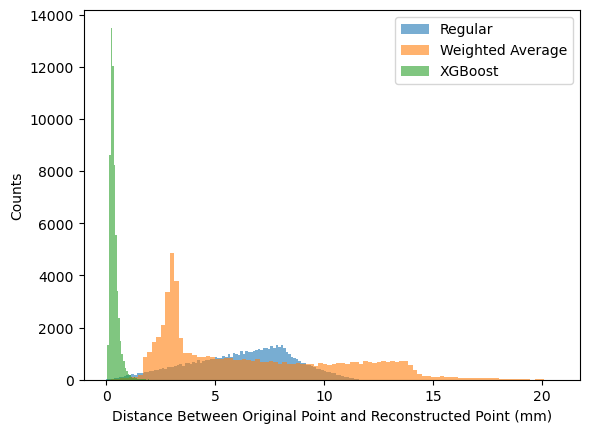

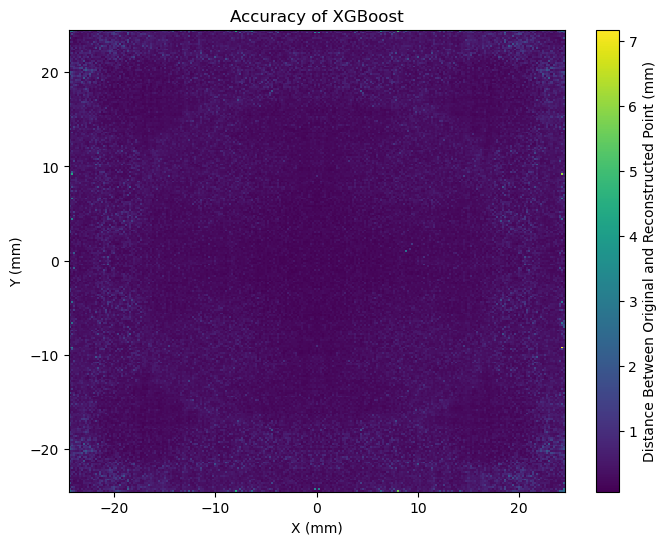

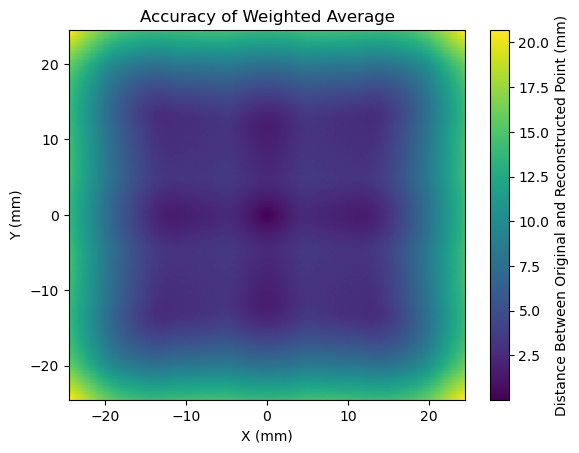

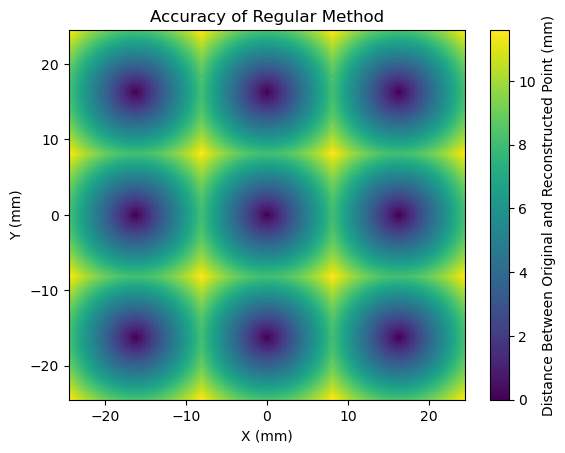

/home/ni/Downloads/Geant4 Data/output_nt_Hits_2mm.csv
Average Regular Distance (mm): 6.251391948378429
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 7.50531633863917
Median Weighted Distance (mm): 6.525859626115792
Average XGBoost Distance (mm): 0.33355684878606984
Median XGBoost Distance (mm): 0.2909573032700131


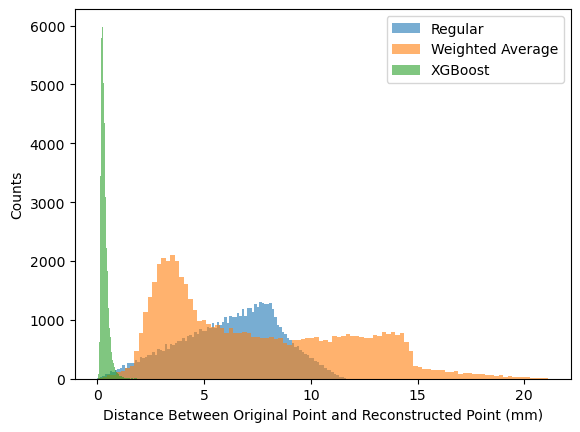

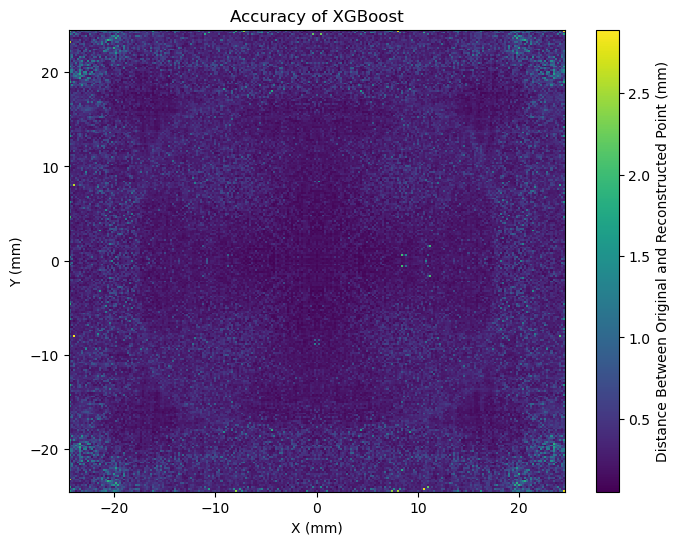

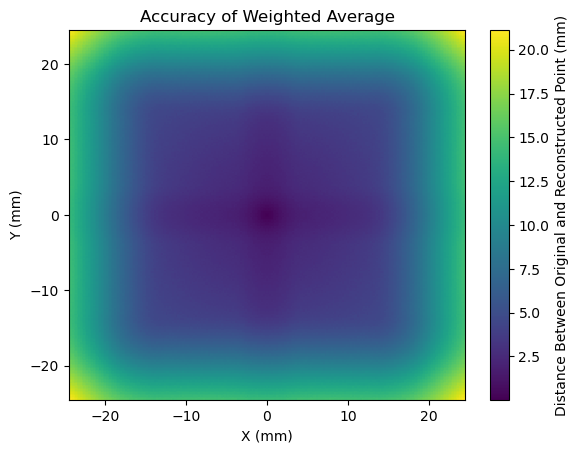

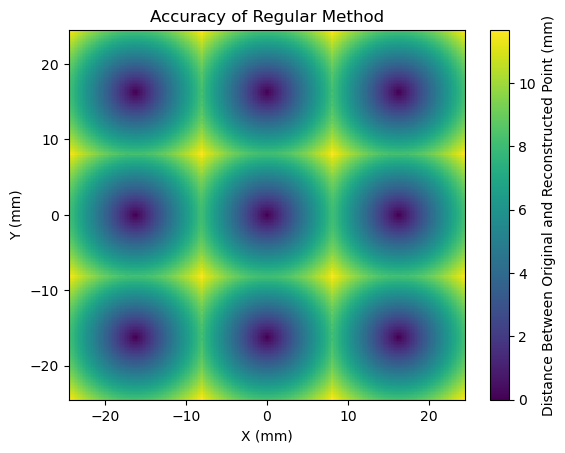

/home/ni/Downloads/Geant4 Data/output_nt_Hits_3mm.csv
Average Regular Distance (mm): 6.251959273904546
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 8.284013471528972
Median Weighted Distance (mm): 7.585194743737543
Average XGBoost Distance (mm): 0.3313804850531561
Median XGBoost Distance (mm): 0.2861337618240652


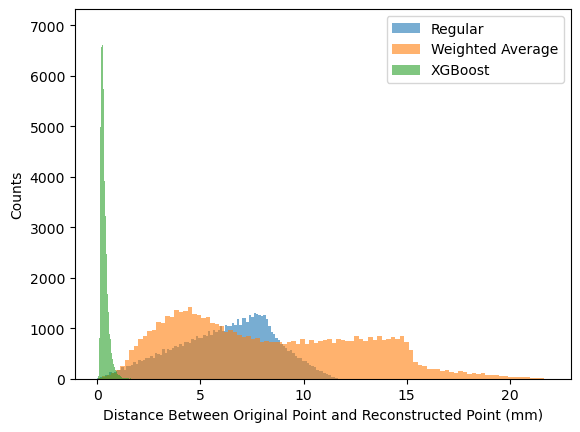

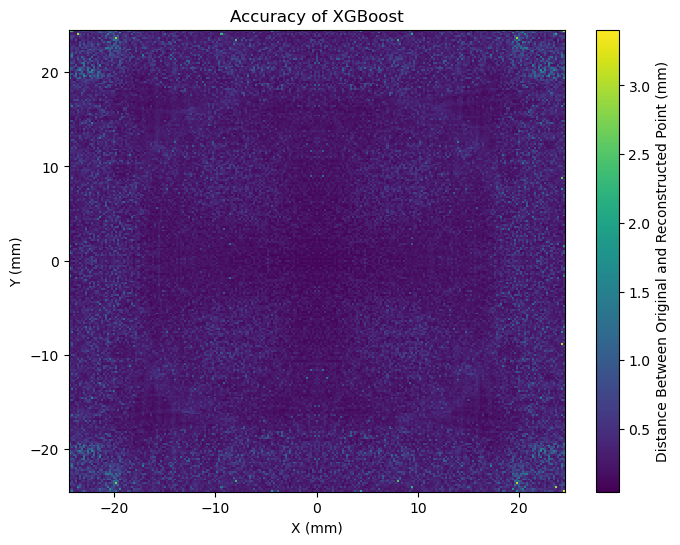

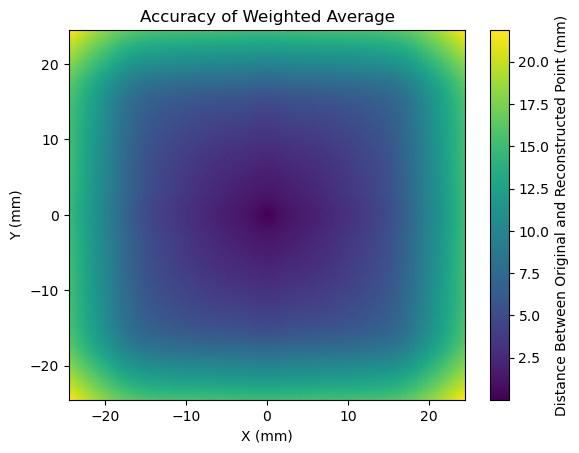

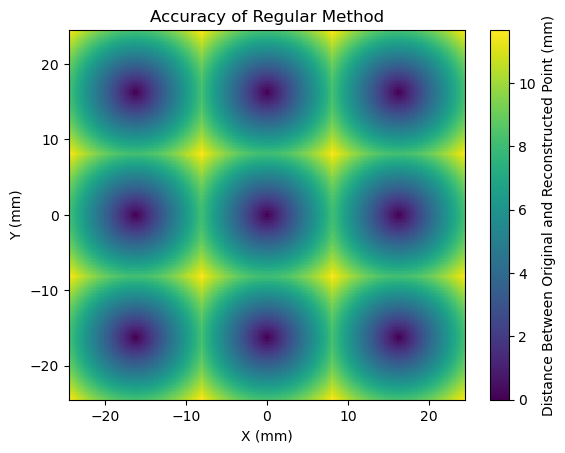

/home/ni/Downloads/Geant4 Data/output_nt_Hits_4mm.csv
Average Regular Distance (mm): 6.2528050076362
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 9.041568830092812
Median Weighted Distance (mm): 8.644247130184946
Average XGBoost Distance (mm): 0.339274256028592
Median XGBoost Distance (mm): 0.29090152699847827


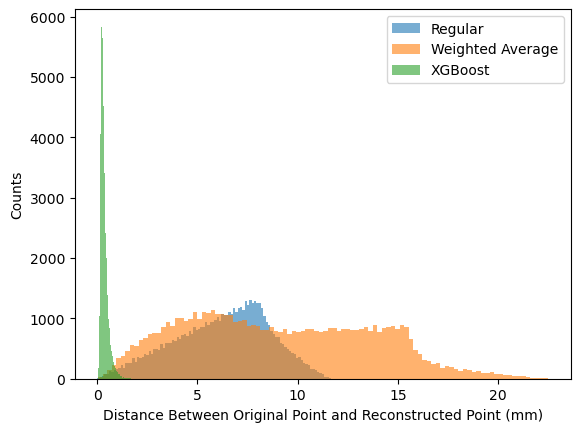

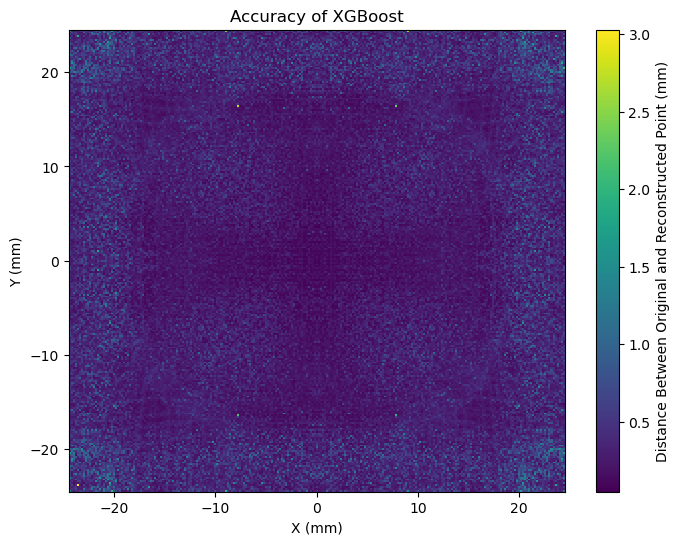

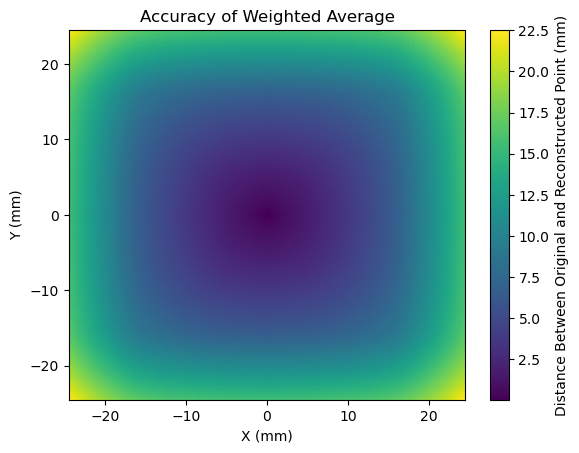

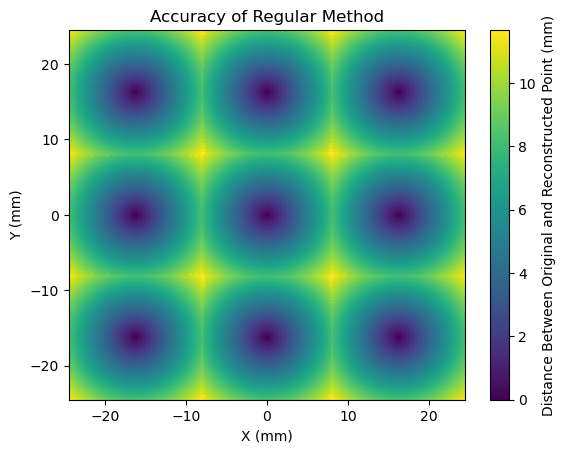

/home/ni/Downloads/Geant4 Data/output_nt_Hits_5mm.csv
Average Regular Distance (mm): 6.255960036848886
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 9.770682315852321
Median Weighted Distance (mm): 9.638136396315831
Average XGBoost Distance (mm): 0.34482544537756205
Median XGBoost Distance (mm): 0.29223824207238475


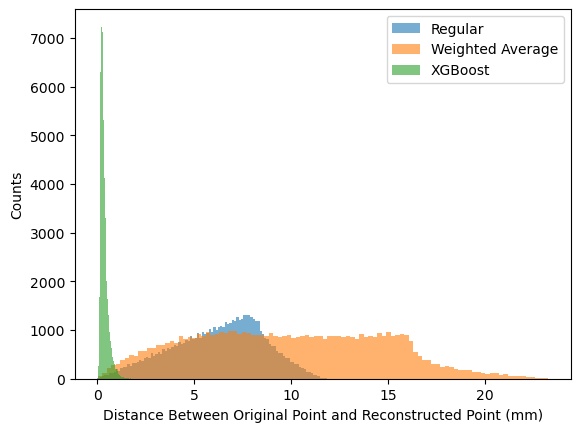

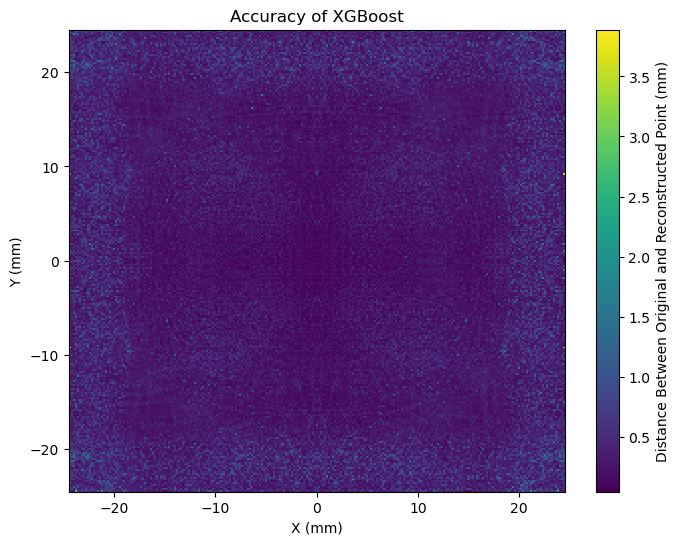

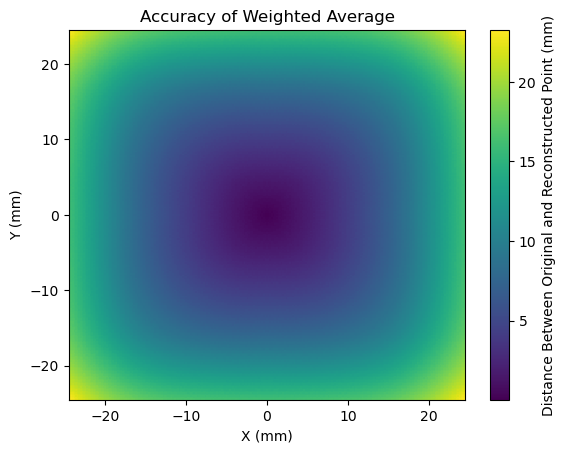

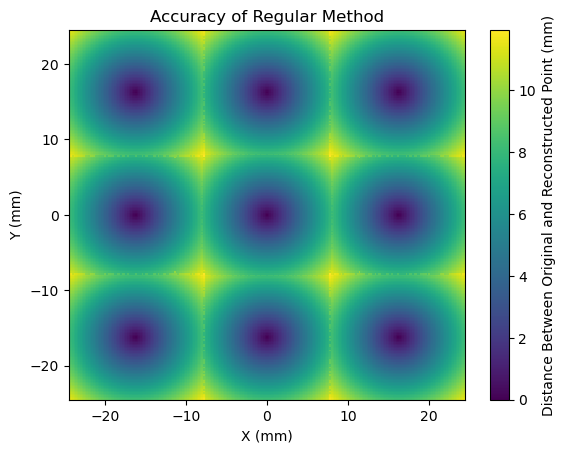

/home/ni/Downloads/Geant4 Data/output_nt_Hits_6mm.csv
Average Regular Distance (mm): 6.258930922522094
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 10.465979868388784
Median Weighted Distance (mm): 10.526581383275504
Average XGBoost Distance (mm): 0.3514628639063121
Median XGBoost Distance (mm): 0.2944688789096286


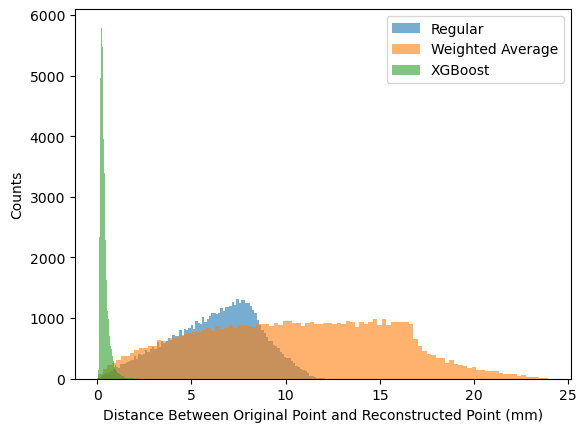

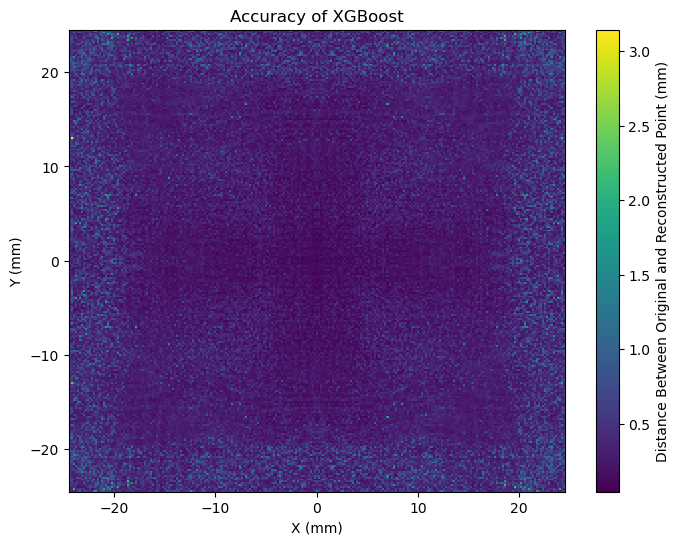

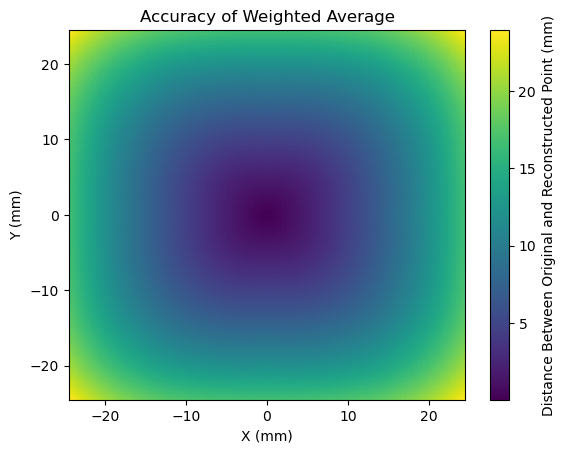

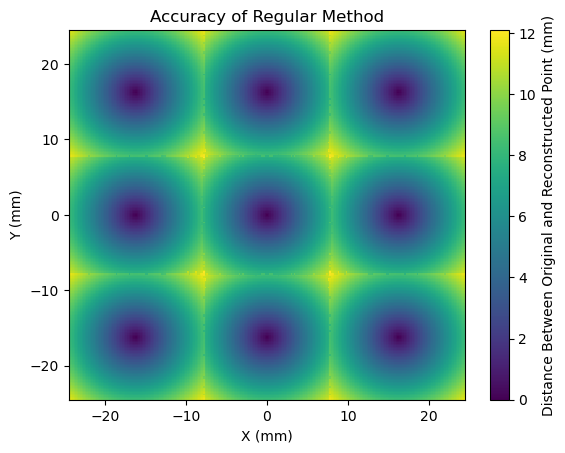

/home/ni/Downloads/Geant4 Data/output_nt_Hits_7mm.csv
Average Regular Distance (mm): 6.264210127080224
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 11.125156276435149
Median Weighted Distance (mm): 11.341674534575214
Average XGBoost Distance (mm): 0.3441136502603499
Median XGBoost Distance (mm): 0.28858834403952077


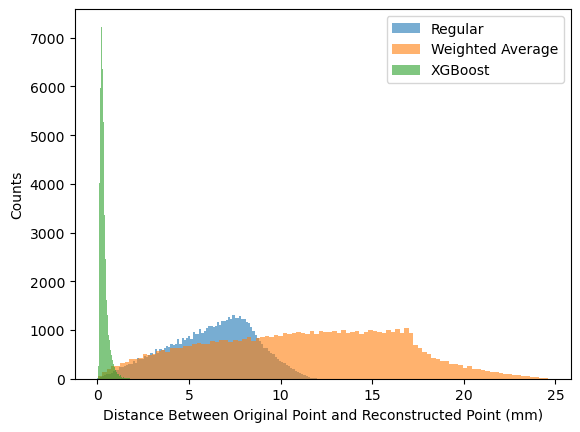

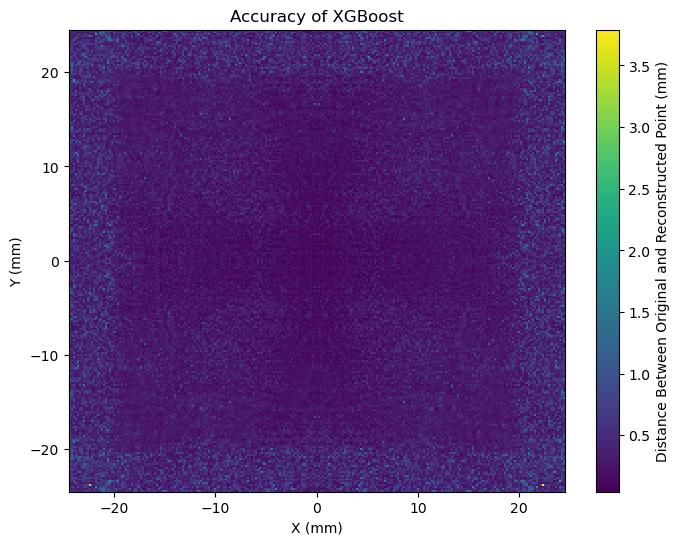

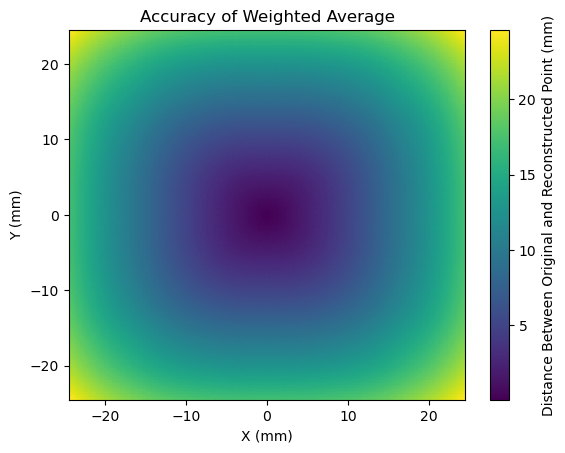

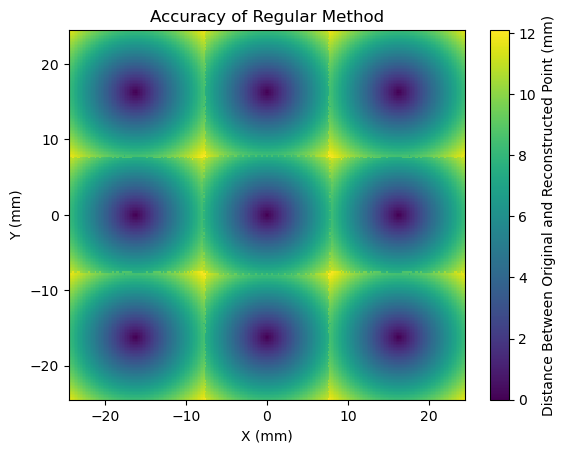

/home/ni/Downloads/Geant4 Data/output_nt_Hits_8mm.csv
Average Regular Distance (mm): 6.2710365230577985
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 11.74732138041681
Median Weighted Distance (mm): 12.07761420026663
Average XGBoost Distance (mm): 0.34076624184772797
Median XGBoost Distance (mm): 0.29190688647148605


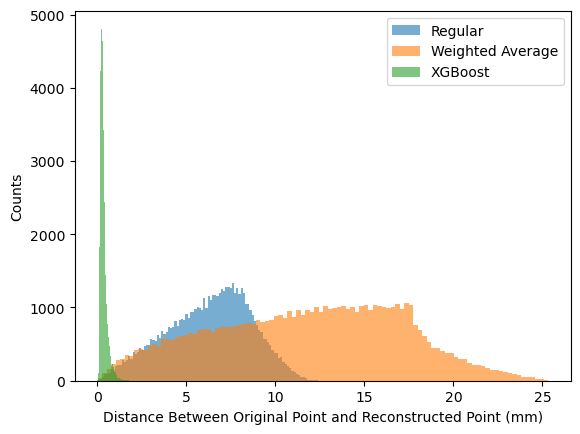

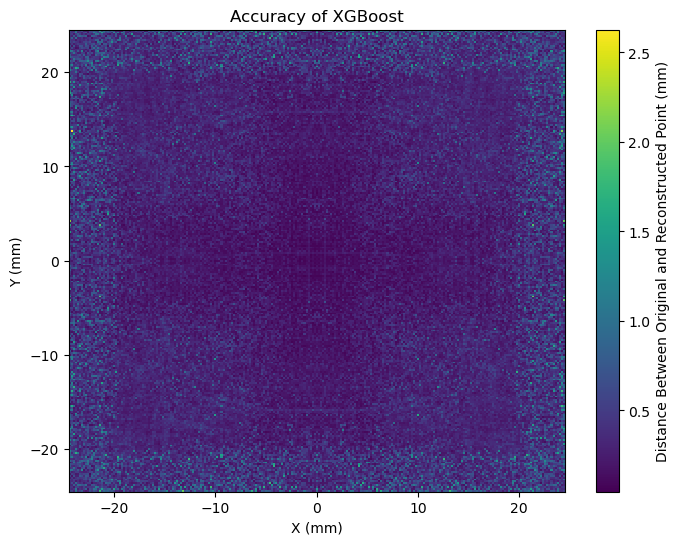

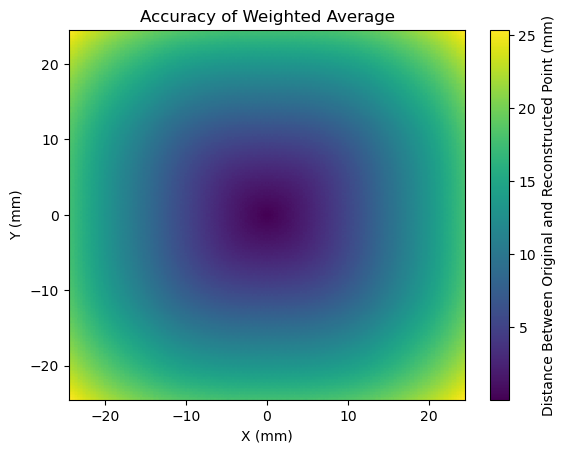

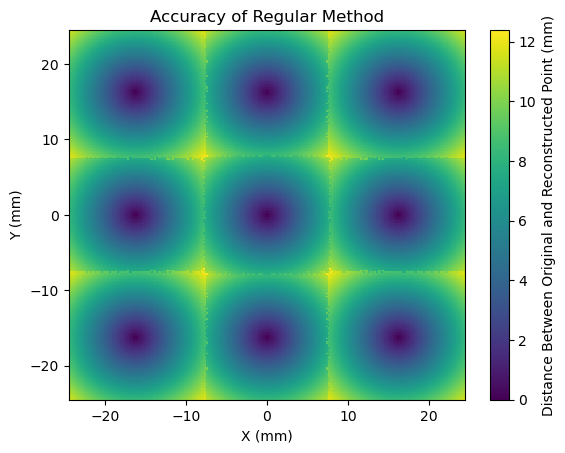

/home/ni/Downloads/Geant4 Data/output_nt_Hits_9mm.csv
Average Regular Distance (mm): 6.2822070635799445
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 12.333419378918244
Median Weighted Distance (mm): 12.741229064400224
Average XGBoost Distance (mm): 0.334933851726517
Median XGBoost Distance (mm): 0.2895152891202048


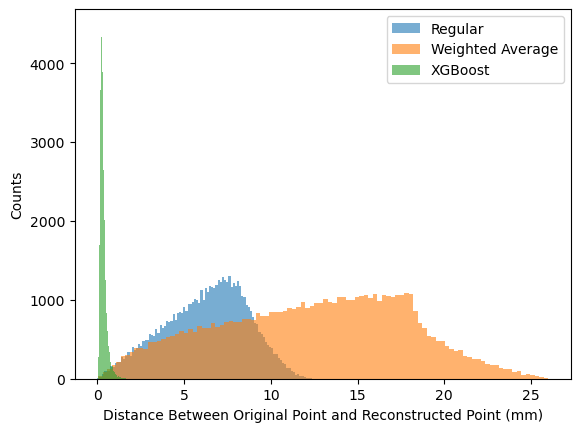

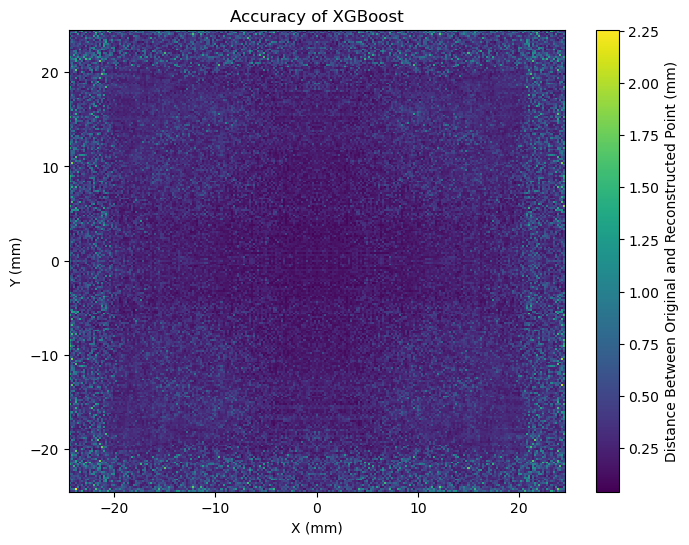

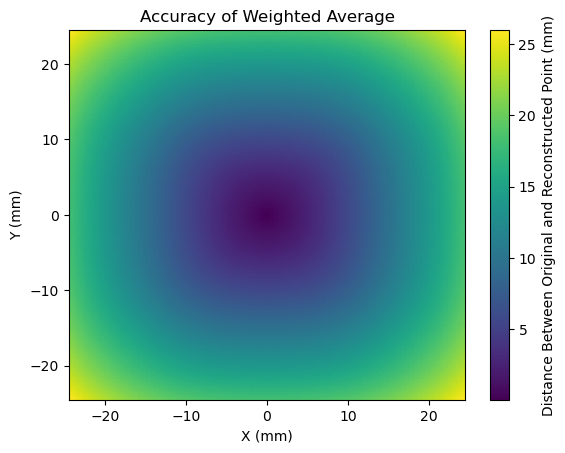

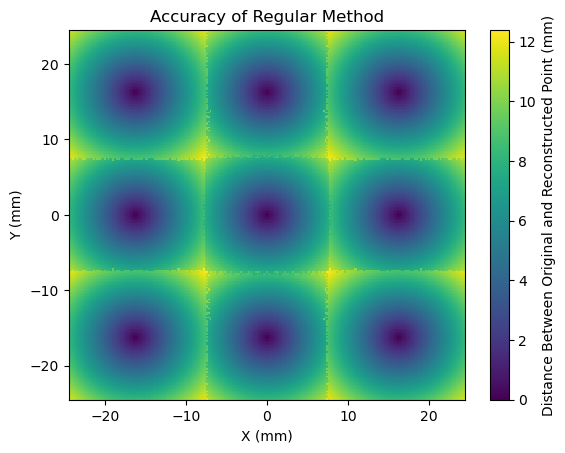

/home/ni/Downloads/Geant4 Data/output_nt_Hits_10mm.csv
Average Regular Distance (mm): 6.300611974265118
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 12.883299297493622
Median Weighted Distance (mm): 13.335840864446983
Average XGBoost Distance (mm): 0.32635259936305416
Median XGBoost Distance (mm): 0.288422170978071


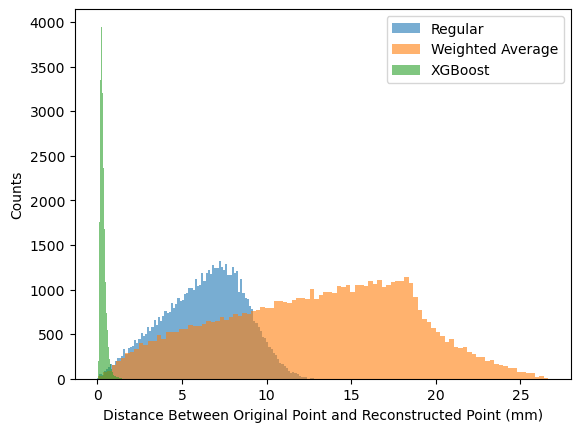

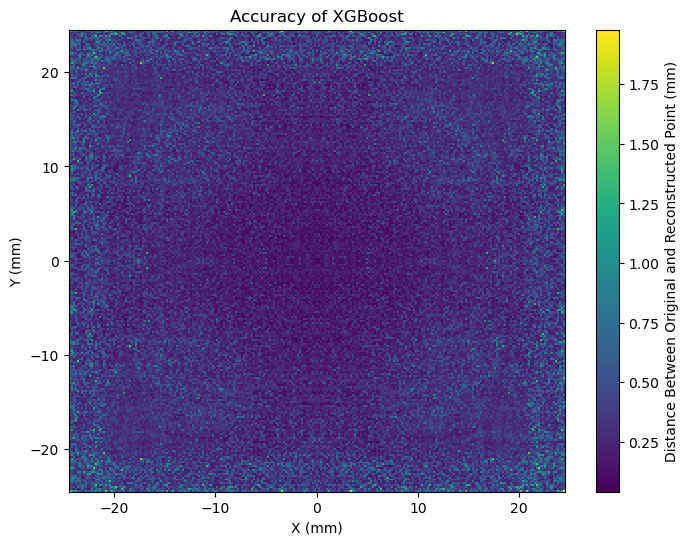

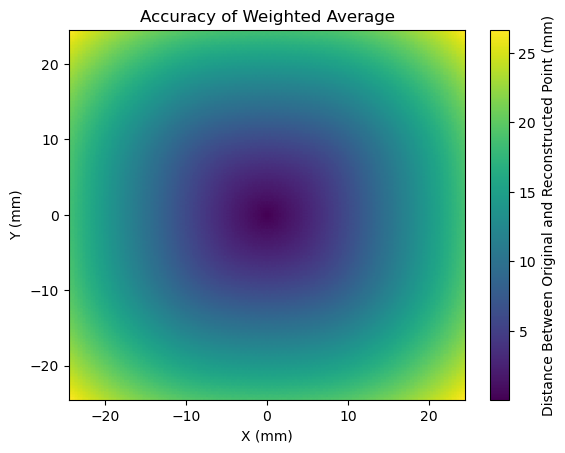

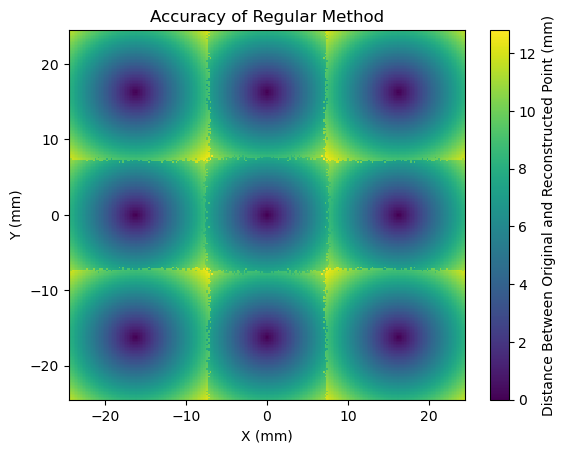

/home/ni/Downloads/Geant4 Data/output_nt_Hits_11mm.csv
Average Regular Distance (mm): 6.337936714167619
Median Regular Distance (mm): 6.514598989960933
Average Weighted Distance (mm): 13.398059204666437
Median Weighted Distance (mm): 13.884263128089795
Average XGBoost Distance (mm): 0.3363439397838573
Median XGBoost Distance (mm): 0.3046371393592073


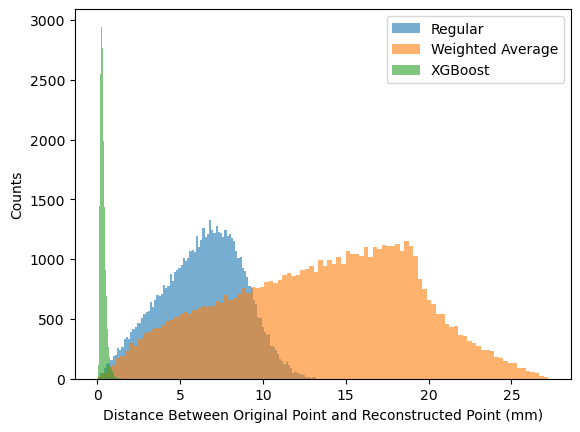

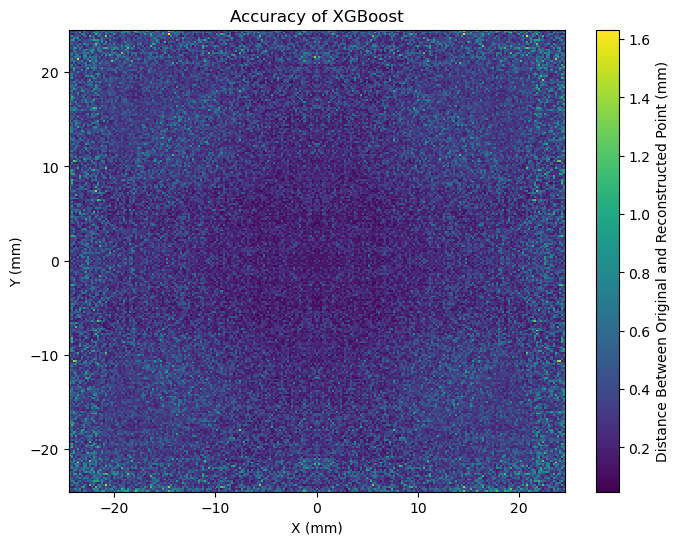

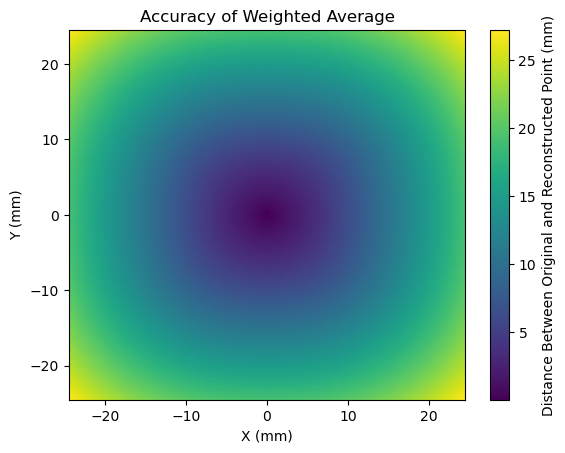

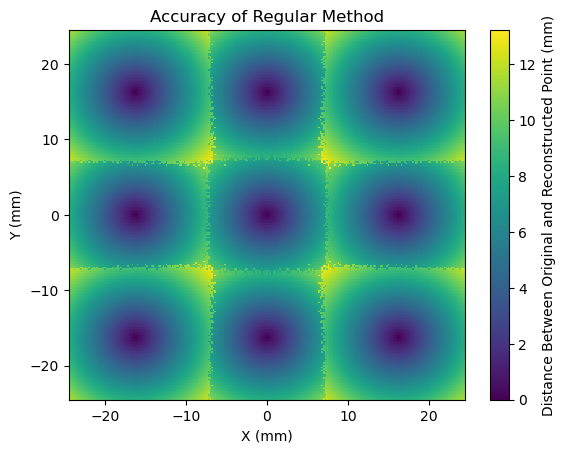

/home/ni/Downloads/Geant4 Data/output_nt_Hits_12mm.csv
Average Regular Distance (mm): 6.41467498351419
Median Regular Distance (mm): 6.518051856191389
Average Weighted Distance (mm): 13.876861128565995
Median Weighted Distance (mm): 14.376592622657935
Average XGBoost Distance (mm): 0.35130979690013725
Median XGBoost Distance (mm): 0.32047679585137817


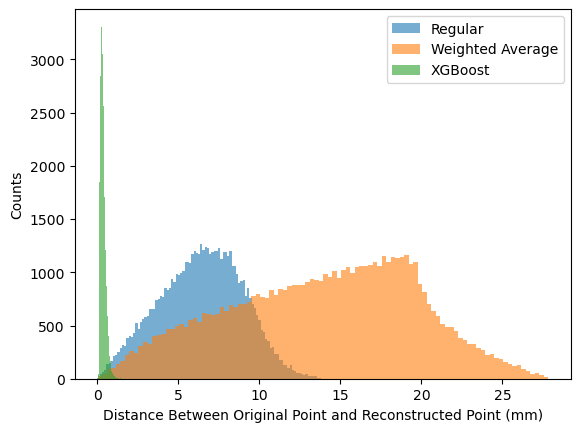

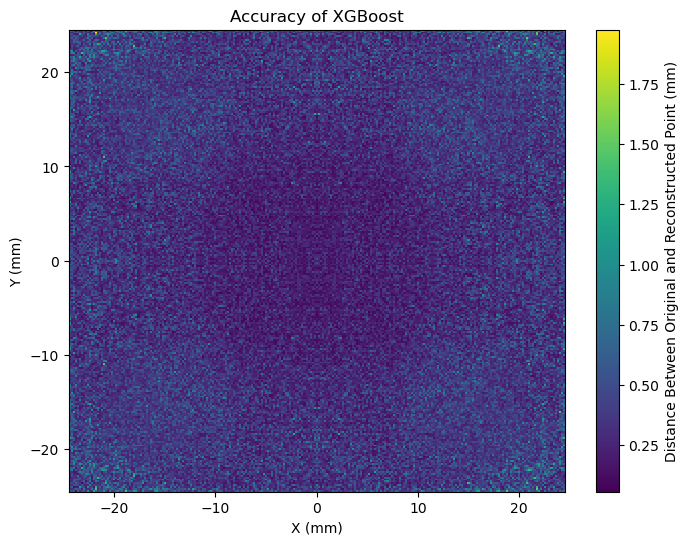

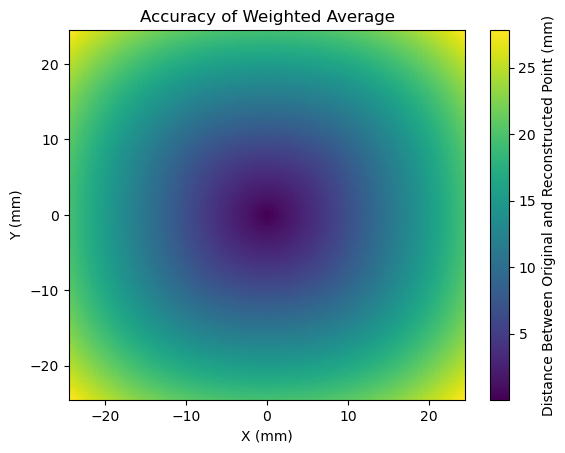

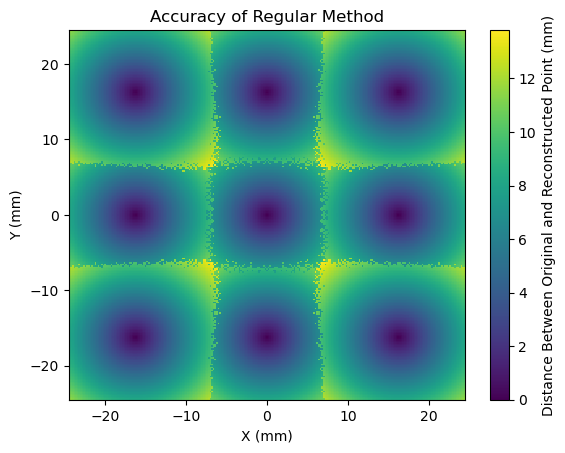

/home/ni/Downloads/Geant4 Data/output_nt_Hits_13mm.csv
Average Regular Distance (mm): 6.522750540488566
Median Regular Distance (mm): 6.5547692560455575
Average Weighted Distance (mm): 14.32220771153032
Median Weighted Distance (mm): 14.846380512874857
Average XGBoost Distance (mm): 0.3748402090726161
Median XGBoost Distance (mm): 0.33953558133854816


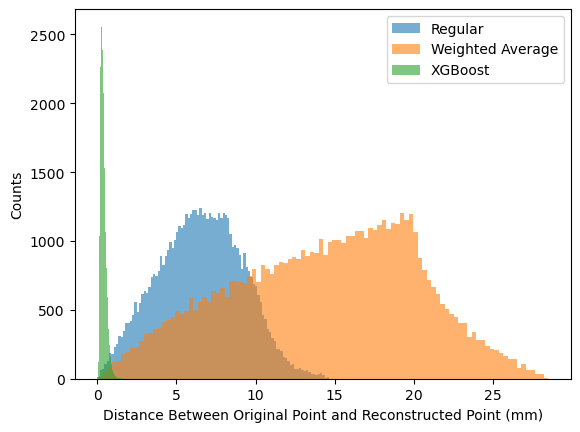

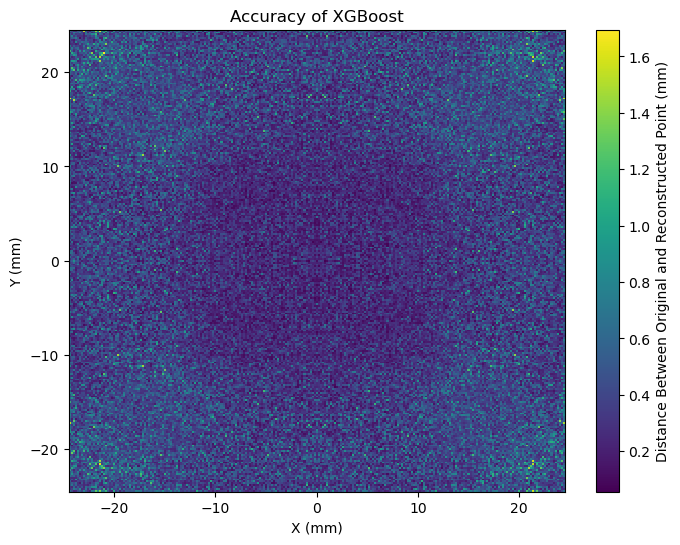

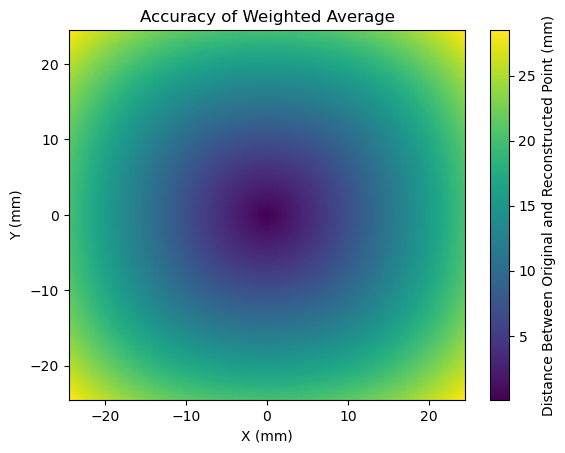

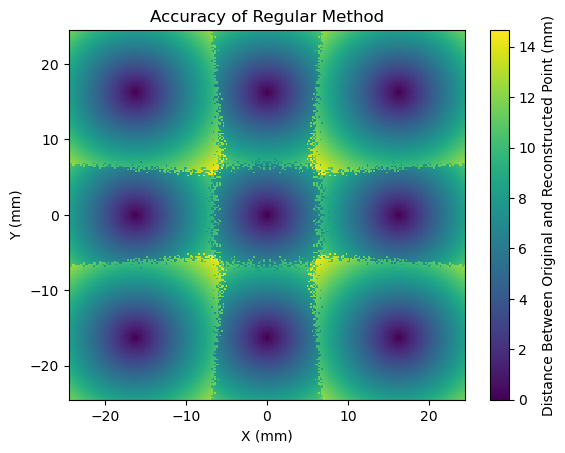

/home/ni/Downloads/Geant4 Data/output_nt_Hits_14mm.csv
Average Regular Distance (mm): 6.627721449529253
Median Regular Distance (mm): 6.615512073906297
Average Weighted Distance (mm): 14.73233739448905
Median Weighted Distance (mm): 15.259739917550288
Average XGBoost Distance (mm): 0.4079814695642884
Median XGBoost Distance (mm): 0.3643714095716773


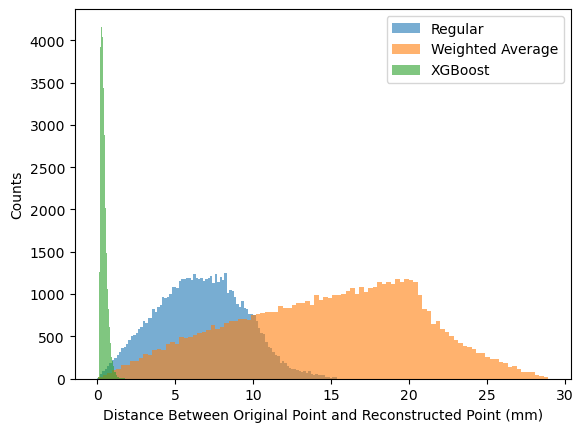

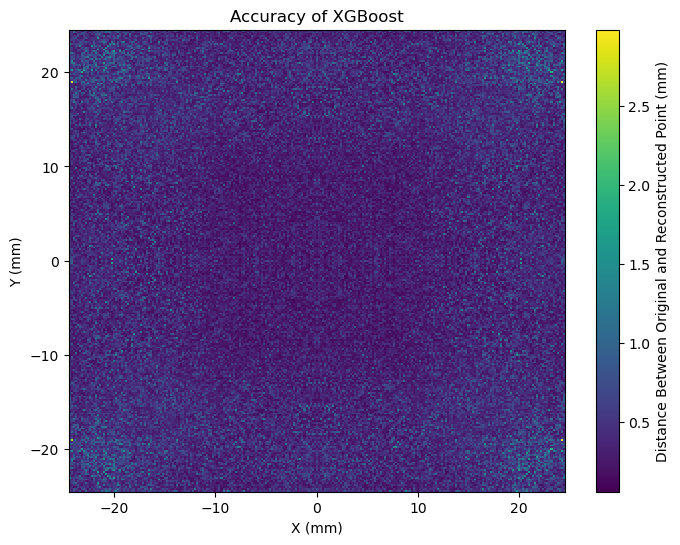

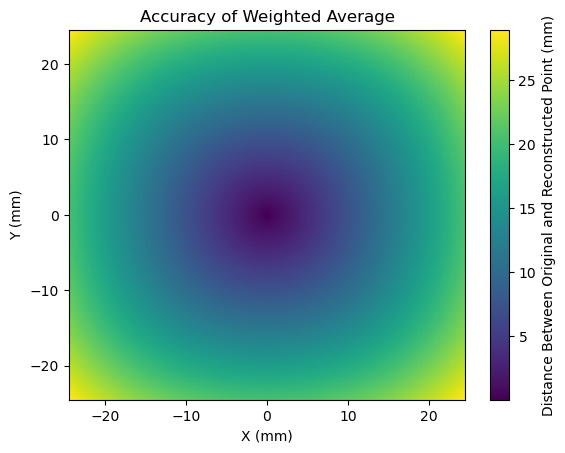

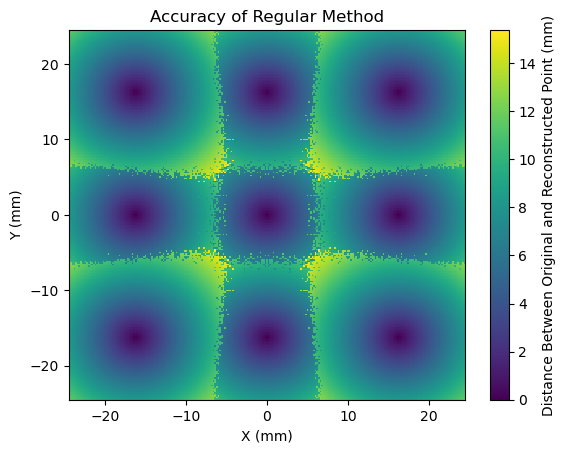

/home/ni/Downloads/Geant4 Data/output_nt_Hits_15mm.csv
Average Regular Distance (mm): 6.7142058298393765
Median Regular Distance (mm): 6.665208173793223
Average Weighted Distance (mm): 15.112599357544452
Median Weighted Distance (mm): 15.662182773328952
Average XGBoost Distance (mm): 0.45804819193184915
Median XGBoost Distance (mm): 0.40342370941314665


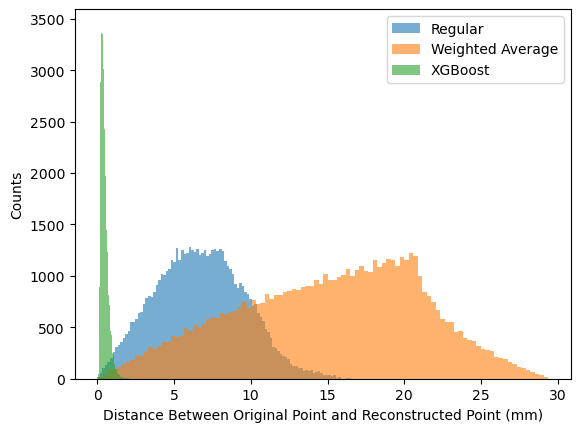

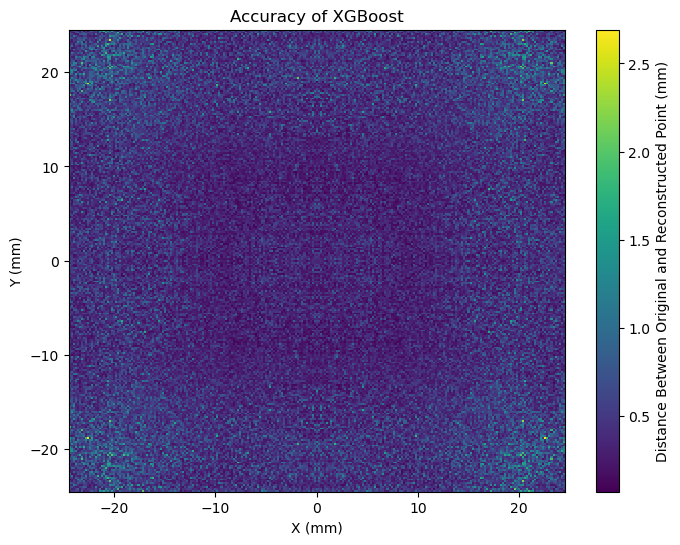

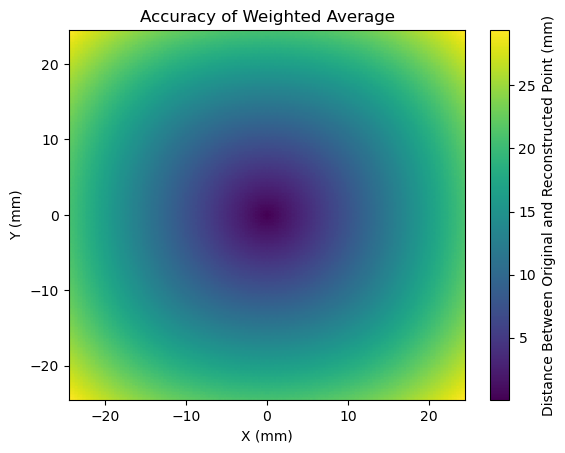

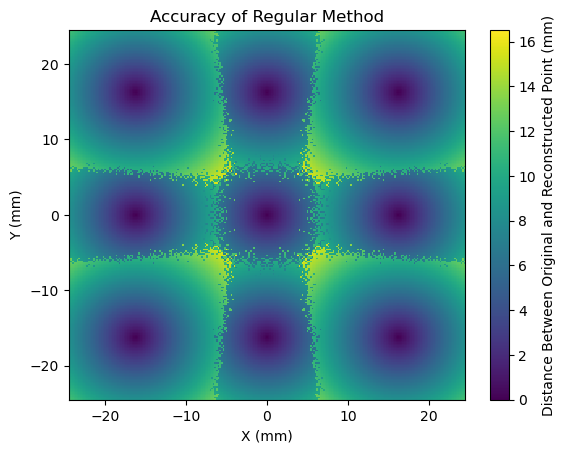

/home/ni/Downloads/Geant4 Data/output_nt_Hits_25mm.csv
Average Regular Distance (mm): 12.949328942910748
Median Regular Distance (mm): 12.560254774486065
Average Weighted Distance (mm): 17.53687628306085
Median Weighted Distance (mm): 18.25733941564192
Average XGBoost Distance (mm): 0.869042271888165
Median XGBoost Distance (mm): 0.7881059192291041


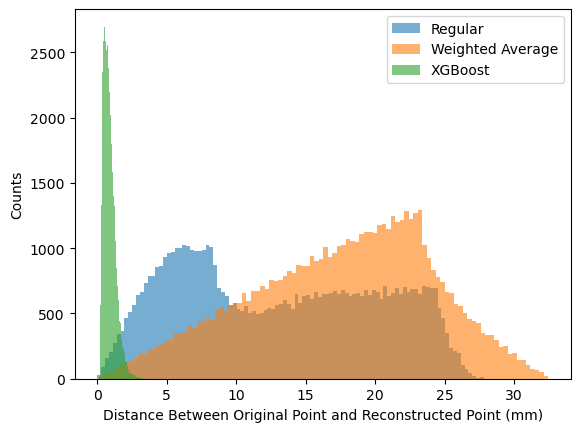

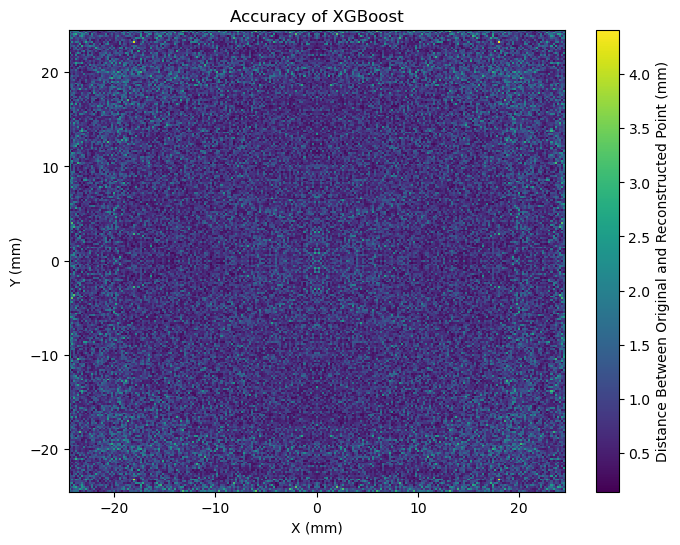

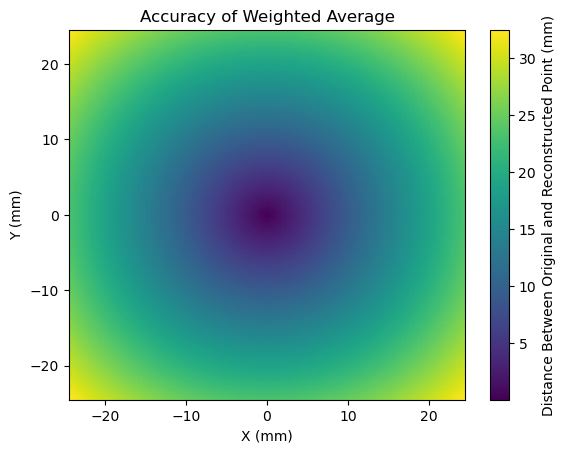

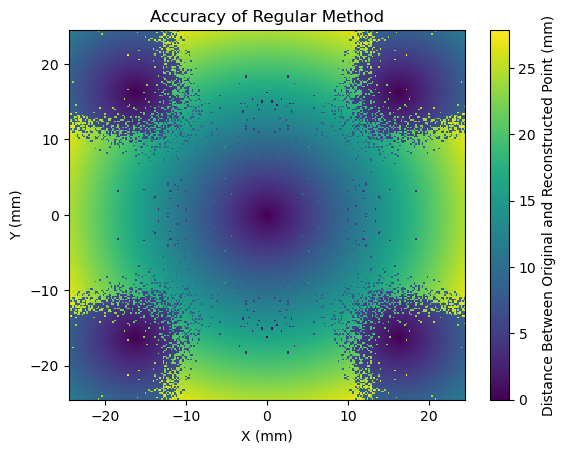

/home/ni/Downloads/Geant4 Data/output_nt_Hits_45mm.csv
Average Regular Distance (mm): 18.746740404691632
Median Regular Distance (mm): 19.54788991170147
Average Weighted Distance (mm): 18.18277056863433
Median Weighted Distance (mm): 18.926064235745322
Average XGBoost Distance (mm): 2.6867151643397964
Median XGBoost Distance (mm): 2.185143863280212


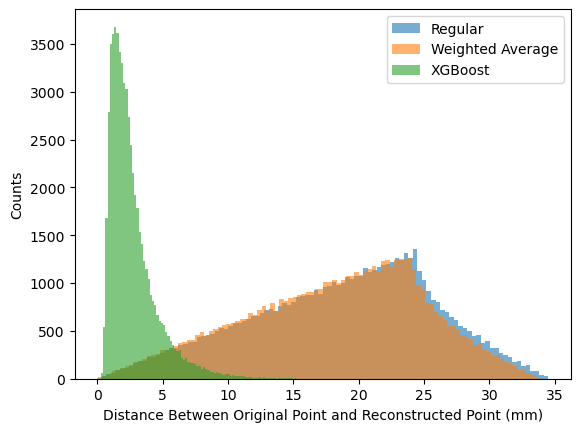

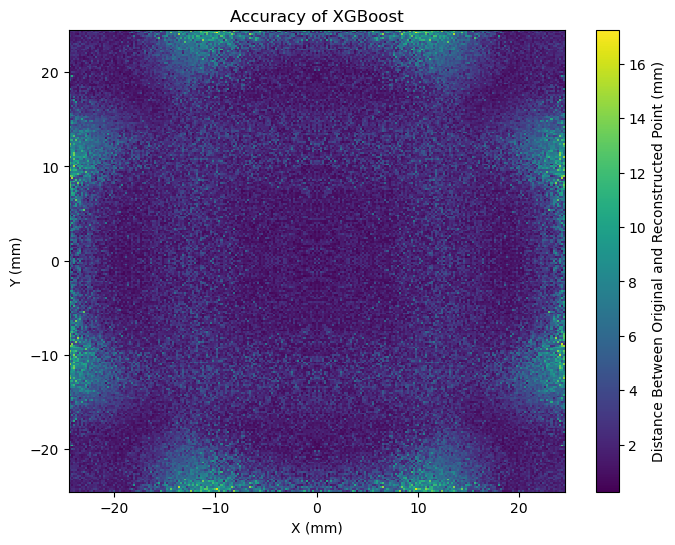

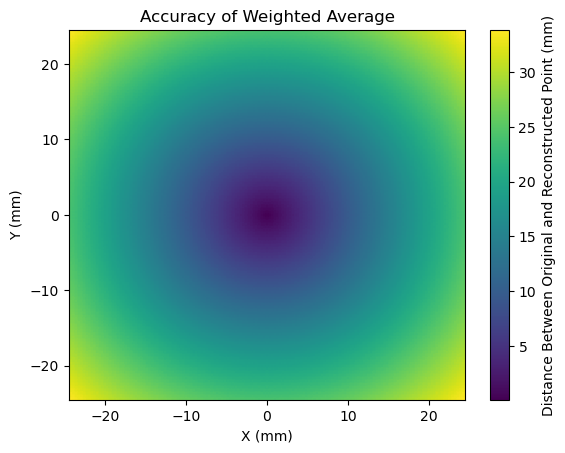

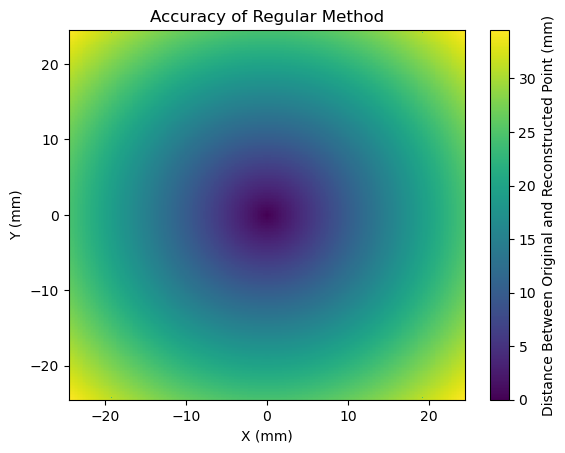

In [3]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 45]
for q in numbers:
    #getting X data
    #file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
    file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    print('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    csvreader = csv.reader(file)
    #first 13 rows aren't needed
    line_count = 0;
    original_X = []
    for row in csvreader:
      if line_count >= 13:
        original_X.append([int(i) for i in row])
      line_count += 1
    
    
    #getting Y data
    original_y = []
    for i in range(-122, 1):
      for j in range(-122, 1):
        original_y.append([i*0.2, j*0.2])
    
    #reconstructing
    num_X = np.array(original_X).reshape(123,123,9)
    num_y = np.array(original_y).reshape(123,123,2)
    bottom_right_X = []
    bottom_right_y = []
    for i in range(-122, 0):
      for j in range(-122, 1):
        tmp_X = copy.deepcopy(num_X[i+122][j+122])
        tmp_y = copy.deepcopy(num_y[i+122][j+122])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        bottom_right_X.append(tmp_X)
        bottom_right_y.append(tmp_y)
    
    bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
    bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)
    
    top_left_X = []
    top_left_y = []
    for i in range(-122, 1):
      for j in range(-122, 0):
        tmp_X = copy.deepcopy(num_X[i+122][j+122])
        tmp_y = copy.deepcopy(num_y[i+122][j+122])
        #mirroring
        tmp_y[1] = -tmp_y[1]
        for k in range(3):
          tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
        top_left_X.append(tmp_X)
        top_left_y.append(tmp_y)
    
    top_left_X = np.array(top_left_X).reshape(123,122,9)
    top_left_y = np.array(top_left_y).reshape(123,122,2)
    
    top_right_X = []
    top_right_y = []
    for i in range(-122, 0):
      for j in range(-122, 0):
        tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
        tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        top_right_X.append(tmp_X)
        top_right_y.append(tmp_y)
    
    top_right_X = np.array(top_right_X).reshape(122,122,9)
    top_right_y = np.array(top_right_y).reshape(122,122,2)
    
    #converting to numpy array
    X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
    y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))
    
    #closest detector
    closest_distances = np.zeros((245,245))
    for i in range(len(X)):
      maximum_value = np.argmax(X[i])
      if maximum_value == 0:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [-16.25, 16.25])
      elif maximum_value == 1:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [0, 16.25])
      elif maximum_value == 2:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [16.25, 16.25])
      elif maximum_value == 3:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [-16.25, 0])
      elif maximum_value == 4:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [0, 0])
      elif maximum_value == 5:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [16.25, 0])
      elif maximum_value == 6:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [-16.25, -16.25])
      elif maximum_value == 7:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [0, -16.25])
      elif maximum_value == 8:
        closest_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist(y[i], [16.25, -16.25])
    
    print("Average Regular Distance (mm): " + str(np.average(closest_distances)))
    print("Median Regular Distance (mm): " + str(np.median(closest_distances)))
    
    #weighted average
    weighted_distances = np.zeros((245,245))
    for i in range(len(X)):
      tmp = X[i]
      coord1 = (-24.4 * (tmp[0] + tmp[3] + tmp[6]) + 24.4 * (tmp[2] + tmp[5] + tmp[8])) / sum(tmp)
      coord2 = (24.4 * (tmp[0] + tmp[1] + tmp[2]) - 24.4 * (tmp[6] + tmp[7] + tmp[8])) / sum(tmp)
      # print([coord1, coord2])
      # print(ans)
      #finding
      weighted_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = math.dist([coord1, coord2], y[i])
    print("Average Weighted Distance (mm): " + str(np.average(weighted_distances)))
    print("Median Weighted Distance (mm): " + str(np.median(weighted_distances)))
    
    #training
    XGBoost_distances = np.zeros((245,245))
    scaler = StandardScaler()
    for k in range(10):
        X_XGBoost = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_XGBoost, y, test_size=0.3)
    
        model = xgb.XGBRegressor()
        model.fit(X_train, y_train)
        
        #finding distances
        yhat = model.predict(X_XGBoost)
        for i in range(len(X)):
            #finding average of each point
            XGBoost_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = k / (k + 1) * XGBoost_distances[122+round(y[i][0]*5)][122-round(y[i][1]*5)] + 1 / (k + 1) * math.dist(yhat[i], y[i])
    
    print("Average XGBoost Distance (mm): " + str(np.average(XGBoost_distances)))
    print("Median XGBoost Distance (mm): " + str(np.median(XGBoost_distances)))
    
    #histogram comparing all 3 methods
    plt.hist(closest_distances.ravel(), bins=100, alpha=0.6, label='Regular')
    plt.hist(weighted_distances.ravel(), bins=100, alpha=0.6, label='Weighted Average')
    plt.hist(XGBoost_distances.ravel(), bins=100, alpha=0.6, label='XGBoost')
    plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
    plt.ylabel('Counts')
    plt.legend(loc='upper right')
    plt.show()
    
    #getting data setup for colormap for XGBoost
    #yhat_temp = model.predict(X)
    xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
    yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
    #creating colormap
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xaxis, yaxis, XGBoost_distances, shading='auto', cmap='viridis')
    
    # Add color bar
    plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')
    
    # Add labels and title
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title('Accuracy of XGBoost')
    
    # Display the plot
    plt.show()
    
    #making colormap for weighted average
    plt.pcolormesh(xaxis, yaxis, weighted_distances, shading='auto', cmap='viridis')
    
    # Add color bar
    plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')
    
    # Add labels and title
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title('Accuracy of Weighted Average')
    
    # Display the plot
    plt.show()
    
    #making colormap for closest
    plt.pcolormesh(xaxis, yaxis, closest_distances, shading='auto', cmap='viridis')
    
    # Add color bar
    plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')
    
    # Add labels and title
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title('Accuracy of Regular Method')
    
    # Display the plot
    plt.show()
    
    closest_distances_all_data.append(closest_distances)
    weighted_distances_all_data.append(weighted_distances)
    XGBoost_distances_all_data.append(XGBoost_distances)

In [4]:
closest_distances_all_data_np = np.array(closest_distances_all_data)
weighted_distances_all_data_np = np.array(weighted_distances_all_data)
XGBoost_distances_all_data_np = np.array(XGBoost_distances_all_data)

np.savetxt('closest_distances_xgboost.csv', closest_distances_all_data_np.reshape(closest_distances_all_data_np.shape[0], -1))
np.savetxt('weighted_distances_xgboost.csv', weighted_distances_all_data_np.reshape(weighted_distances_all_data_np.shape[0], -1))
np.savetxt('XGBoost_distances_xgboost.csv', XGBoost_distances_all_data_np.reshape(XGBoost_distances_all_data_np.shape[0], -1))

#print(XGBoost_distances_all_data_np.shape)